In [1]:
push!(LOAD_PATH,"C:/JMB/DIVAnd.jl/src","."); using DIVAnd;using PyPlot
#using NCDatasets
#using DataStructures
using Statistics
using DelimitedFiles
using LinearAlgebra
using Random

┌ Info: Precompiling DIVAnd [top-level]
└ @ Base loading.jl:1187


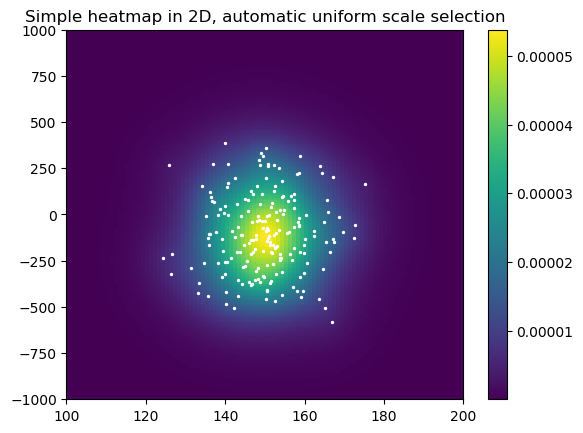

PyObject Text(0.5, 1.0, 'Simple heatmap in 2D, automatic uniform scale selection')

In [2]:
NX=100
NY=150
# Box size
LX=100
LY=2000
# Bounding box
xleft=100
ybot=-1000
xright=xleft+LX
ytop=ybot+LY
# For the synthetic case, number of points
NP=200
Random.seed!(1234)
xo=xleft .+ LX*(rand(NP))
xo=xleft .+ LX*(0.5 .+ 0.1*randn(NP))
yo=ybot .+ LY*rand(NP)
yo=ybot .+ LY*(0.45 .+ 0.1*randn(NP))
inflation=ones(Float64,NP)
#test for weights on poins
inflation[yo.>ybot+LY/2].= 1


# Eliminate points out of the box
sel=(xo.>xleft) .& (xo.<xright) .& (yo.>ybot) .& (yo.<ytop)

xo=xo[sel]
yo=yo[sel]
inflation=inflation[sel]

NP=size(xo)[1]

dx=LX/(NX)
dy=LY/(NY)

xg = xleft+dx/2:dx:xleft+LX
yg = ybot+dy/2:dy:ybot+LY
# for pyplot
xp=xleft:dx:xleft+LX
yp = ybot:dy:ybot+LY
maskp,(pmp,pnp),(xip,yip) = DIVAnd.DIVAnd_rectdom(xp,yp)

mask,(pm,pn),(xi,yi)= DIVAnd.DIVAnd_rectdom(xg,yg)

dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0)

figure()
pcolor(xip,yip,dens2),colorbar()
scatter(xo,yo,s=2,c="white")
title("Simple heatmap in 2D, automatic uniform scale selection")

In [3]:
size(dens2)

(100, 150)

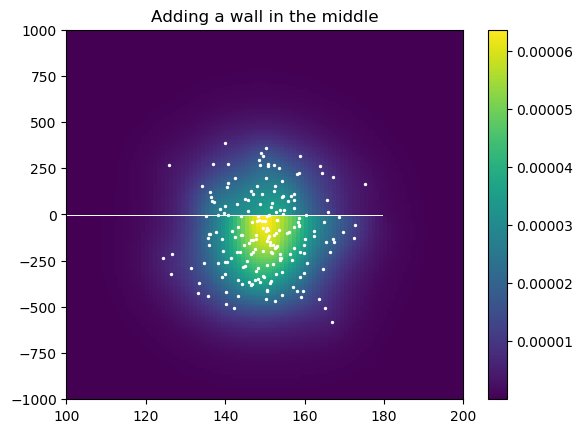

PyObject Text(0.5, 1.0, 'Adding a wall in the middle')

In [4]:
mask[1:80,75].=false

dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0)

figure()
pcolor(xip,yip,dens2),colorbar()
scatter(xo,yo,s=2,c="white")
title("Adding a wall in the middle")

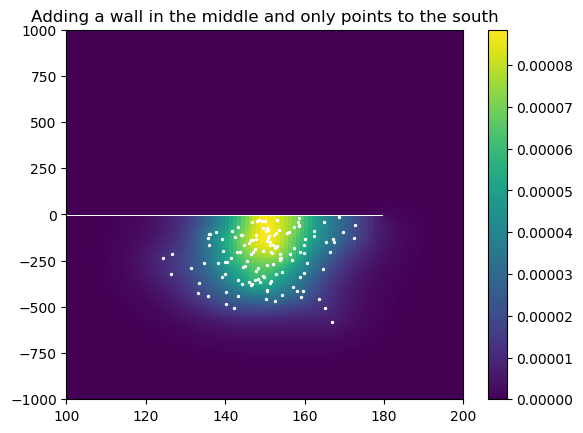

PyObject Text(0.5, 1.0, 'Adding a wall in the middle and only points to the south')

In [5]:
sel= (yo.<-10.)

xo=xo[sel]
yo=yo[sel]
inflation=inflation[sel]
dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0)

figure()
pcolor(xip,yip,dens2),colorbar()
scatter(xo,yo,s=2,c="white")
title("Adding a wall in the middle and only points to the south")

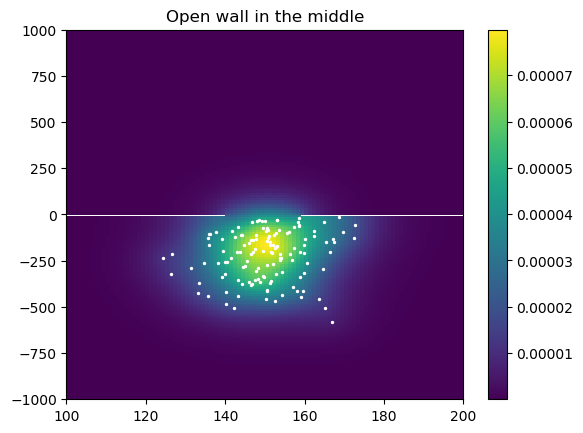

PyObject Text(0.5, 1.0, 'Open wall in the middle')

In [6]:
mask.=true
mask[1:40,75].=false
mask[60:end,75].=false
dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,yo),inflation,0)

figure()
pcolor(xip,yip,dens2),colorbar()
scatter(xo,yo,s=2,c="white")
title("Open wall in the middle")

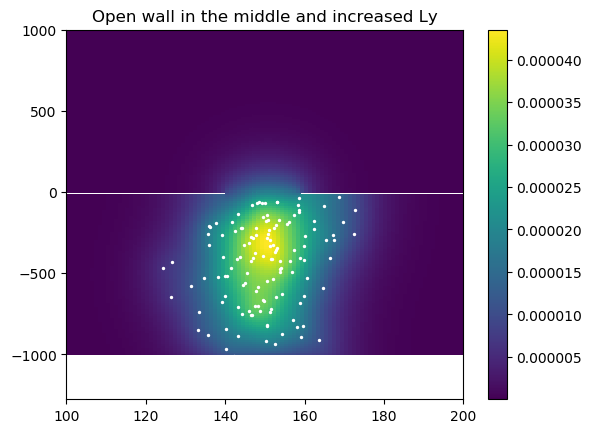

PyObject Text(0.5, 1.0, 'Open wall in the middle and increased Ly')

In [7]:
dens2,LHM,LCV,LSCV=DIVAnd_heatmap(mask,(pm,pn),(xi,yi),(xo,2*yo),inflation,(4,100))

figure()
pcolor(xip,yip,dens2),colorbar()
scatter(xo,2*yo,s=2,c="white")
title("Open wall in the middle and increased Ly")

┌ Warning: Method GridKernel does not allow for cross validation. If you need the latter, force myheatmapmethod to DataKernel
└ @ DIVAnd C:\JMB\DIVAnd.jl\src\DIVAnd_heatmap.jl:63
┌ Warning: Method GridKernel does not allow for cross validation. If you need the latter, force myheatmapmethod to DataKernel
└ @ DIVAnd C:\JMB\DIVAnd.jl\src\DIVAnd_heatmap.jl:63
┌ Warning: Unoptimized versions do not allow for cross validation
└ @ DIVAnd C:\JMB\DIVAnd.jl\src\DIVAnd_heatmap.jl:68


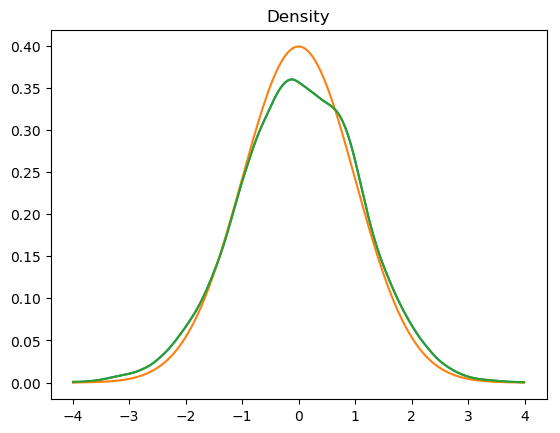

(norm(dens1D - dens1Db), norm(dens1D), norm(dens1Db - dens1Dc), norm(gaussiansol - dens1D)) = (0.00226739251092447, 4.026275232462498, 6.8959201164571e-7, 0.3500690242995919)


(0.00226739251092447, 4.026275232462498, 6.8959201164571e-7, 0.3500690242995919)

In [8]:
NX1D=500
LX1D=8
xleft1D=-4
dx1D=LX1D/(NX1D)

xg1D = xleft1D+dx1D/2:dx1D:xleft1D+LX1D
mask1D,pm1D,xi1D = DIVAnd.DIVAnd_rectdom(xg1D)



xo=randn(1000)
inflation=ones(size(xo))

dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0)
dens1Db,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0,myheatmapmethod="GridKernel",alphabc=0)
dens1Dc,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0,myheatmapmethod="GridKernel",optimizeheat=false,alphabc=0)

gaussiansol=1/sqrt(2*pi)*exp.(-0.5*(xi1D[1].^2.0))

figure()
plot(xi1D[1],dens1D,xi1D[1],gaussiansol,xi1D[1],dens1Db)

title("Density")
@show norm(dens1D-dens1Db),norm(dens1D),norm(dens1Db-dens1Dc),norm(gaussiansol-dens1D)

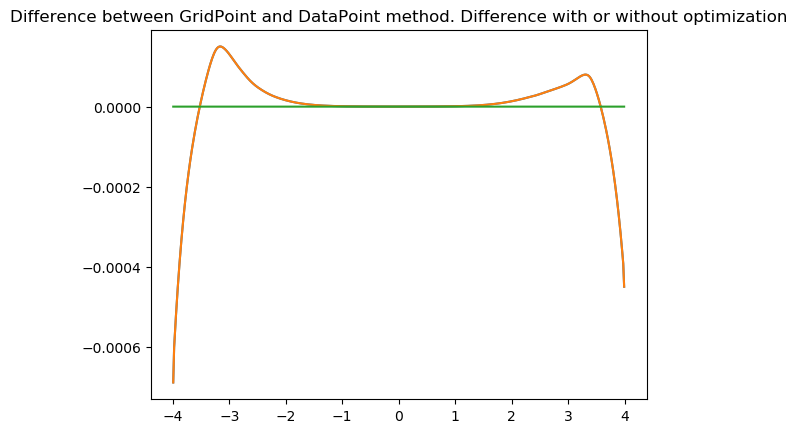

PyObject Text(0.5, 1.0, 'Difference between GridPoint and DataPoint method. Difference with or without optimization')

In [9]:
plot(xi1D[1],dens1D-dens1Db,xi1D[1],dens1D-dens1Dc,xi1D[1],dens1Db-dens1Dc)
title("Difference between GridPoint and DataPoint method. Difference with or without optimization")

  2.721399 seconds (2.35 M allocations: 144.471 MiB, 2.65% gc time)
  0.028948 seconds (54.31 k allocations: 41.925 MiB, 29.26% gc time)


┌ Warning: Unoptimized versions do not allow for cross validation
└ @ DIVAnd C:\JMB\DIVAnd.jl\src\DIVAnd_heatmap.jl:68


  1.249588 seconds (3.56 M allocations: 1.136 GiB, 13.01% gc time)


┌ Warning: Unoptimized versions do not allow for cross validation
└ @ DIVAnd C:\JMB\DIVAnd.jl\src\DIVAnd_heatmap.jl:68


  1.257951 seconds (3.55 M allocations: 1.136 GiB, 12.82% gc time)


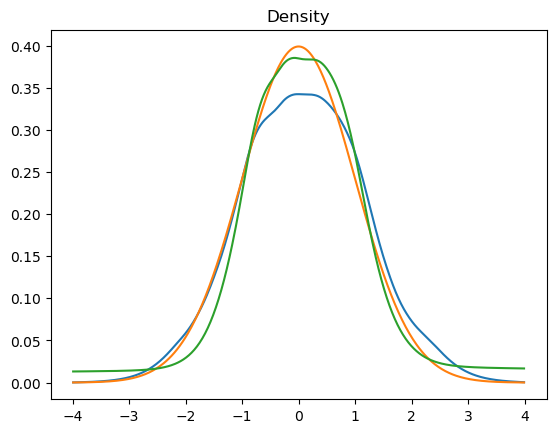

norm(dens1D1 - dens1D1nopt) = 7.437352393100813e-8


7.437352393100813e-8

In [10]:
NX1D=500
LX1D=8
xleft1D=-4
dx1D=LX1D/(NX1D)

xg1D = xleft1D+dx1D/2:dx1D:xleft1D+LX1D
mask1D,pm1D,xi1D = DIVAnd.DIVAnd_rectdom(xg1D)



xo=randn(100)
inflation=ones(size(xo))

dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0)
@time dens1D1,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,1;Ladaptiveiterations=1)
@time dens1D1,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,1;Ladaptiveiterations=2)
@time dens1D1nopt,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,1;Ladaptiveiterations=2,optimizeheat=false)
@time dens1D1nopt,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,1;Ladaptiveiterations=2,optimizeheat=false)

gaussiansol=1/sqrt(2*pi)*exp.(-0.5*(xi1D[1].^2.0))

figure()
plot(xi1D[1],dens1D,xi1D[1],gaussiansol,xi1D[1],dens1D1)

title("Density")
@show norm(dens1D1-dens1D1nopt)

(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (4.508431680494911, 0.005, -Inf, -0.0029912726996442762)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (3.6819192112060897, 0.01, -2.632225222716865, -0.11190485812010131)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (3.15789738596286, 0.015, -2.136734999413793, -0.17426727978291168)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (2.818810774396801, 0.02, -1.8768713296072184, -0.21116300238744196)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (2.570088315598584, 0.025, -1.724881848391706, -0.2350044643329039)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (2.372022514708737, 0.03, -1.6293181089607103, -0.2511594626850415)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (2.207289383114926, 0.035, -1.5660741972541987, -0.26237630901555226)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (2.0667491574867727, 0.04, -1.5225118989281474, -0.27029888599514035)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (1.9445942152377198, 0.045, -1.4914806021275404

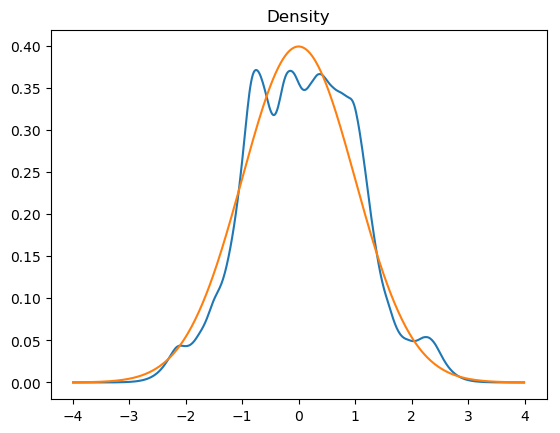


(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (0.611883657144681, 0.495, -1.4153126574110735, -0.28231201791001037)
(norm(dens1D - gaussiansol), HH, LCV, LSCV) = (0.6206868655442992, 0.5, -1.4163794336827231, -0.2821156192113391)


PyObject Text(0.5, 1.0, 'Density')

In [11]:
NSAM=100
CV1=zeros(Float64,NSAM)
CV2=zeros(Float64,NSAM)
BW=zeros(Float64,NSAM)
for jjj=1:NSAM
    HH=0.005*jjj
    dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,HH;Ladaptiveiterations=0)
    @show norm(dens1D-gaussiansol),HH,LCV,LSCV
    CV1[jjj]=LCV
    CV2[jjj]=LSCV
    BW[jjj]=HH
    
end
dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0.195;Ladaptiveiterations=0)
gaussiansol=1/sqrt(2*pi)*exp.(-0.5*(xi1D[1].^2.0))

figure()
plot(xi1D[1],dens1D,xi1D[1],gaussiansol)

title("Density")

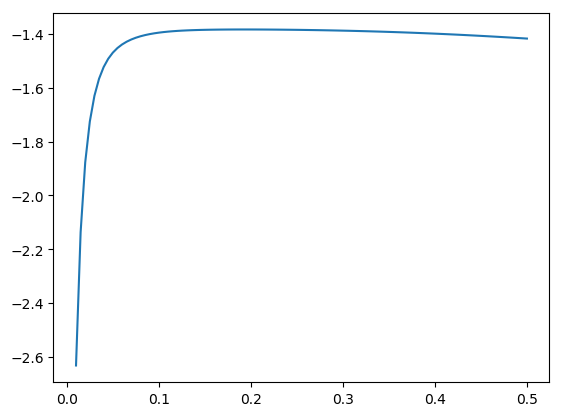

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000042707780>

In [12]:
plot(BW,CV1)

In [13]:
BW[findmax(CV1)[2]]

0.195

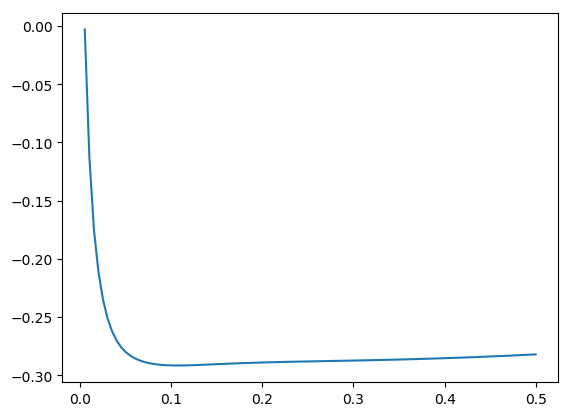

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000427666A0>

In [14]:
plot(BW,CV2)

In [15]:
BW[findmin(CV2)[2]]

0.105

In [16]:
findmin(CV2)

(-0.2916521208439844, 21)

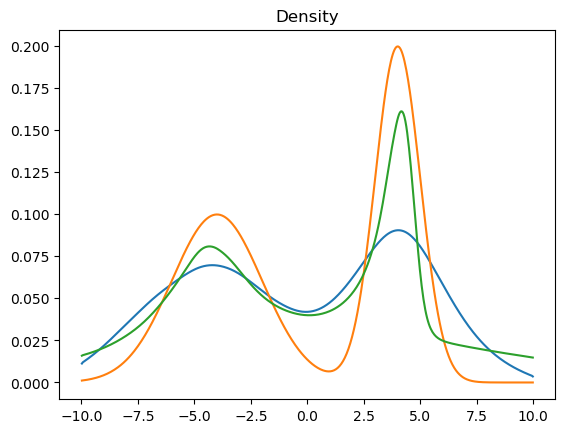

PyObject Text(0.5, 1.0, 'Density')

In [17]:
NX1D=500
LX1D=20
xleft1D=-10
dx1D=LX1D/(NX1D)

xg1D = xleft1D+dx1D/2:dx1D:xleft1D+LX1D
mask1D,pm1D,xi1D = DIVAnd.DIVAnd_rectdom(xg1D)



xa=randn(100).+4
xb=2*randn(100).-4.
xo=[xa...,xb...]

inflation=ones(size(xo))

dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0)
dens1D1,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=4)

gaussiansol=0.5/sqrt(2*pi)*exp.(-0.5*((xi1D[1].-4).^2.0))+0.5/(2*sqrt(2*pi))*exp.(-0.5*(((xi1D[1].+4)./2).^2.0))

figure()
plot(xi1D[1],dens1D,xi1D[1],gaussiansol,xi1D[1],dens1D1)

title("Density")

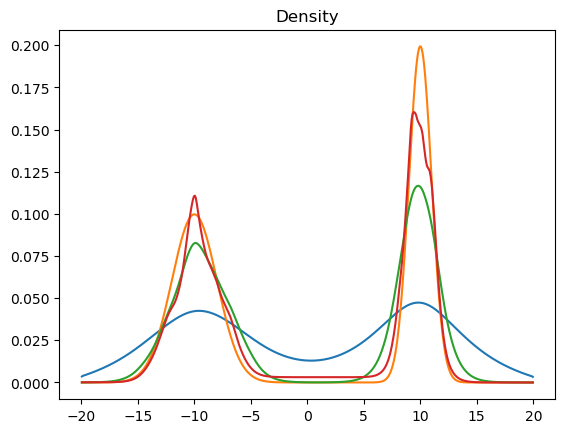

PyObject Text(0.5, 1.0, 'Density')

In [18]:
NX1D=500
LX1D=40
xleft1D=-20
dx1D=LX1D/(NX1D)

xg1D = xleft1D+dx1D/2:dx1D:xleft1D+LX1D
mask1D,pm1D,xi1D = DIVAnd.DIVAnd_rectdom(xg1D)



xa=randn(100).+10
xb=2*randn(100).-10.
xo=[xa...,xb...]

inflation=ones(size(xo))

dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0)
dens1D1,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,1;Ladaptiveiterations=0)
dens1D1i,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,1.3;Ladaptiveiterations=1)

gaussiansol=0.5/sqrt(2*pi)*exp.(-0.5*((xi1D[1].-10).^2.0))+0.5/(2*sqrt(2*pi))*exp.(-0.5*(((xi1D[1].+10)./2).^2.0))

figure()
plot(xi1D[1],dens1D,xi1D[1],gaussiansol,xi1D[1],dens1D1,xi1D[1],dens1D1i)

title("Density")

# Some effects of Boundary Conditions (uniform data in 0-1)

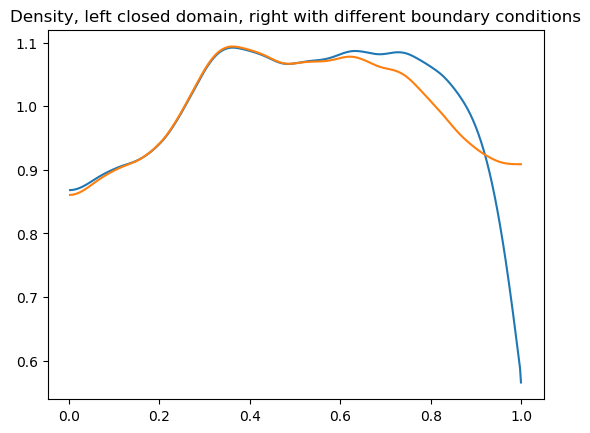

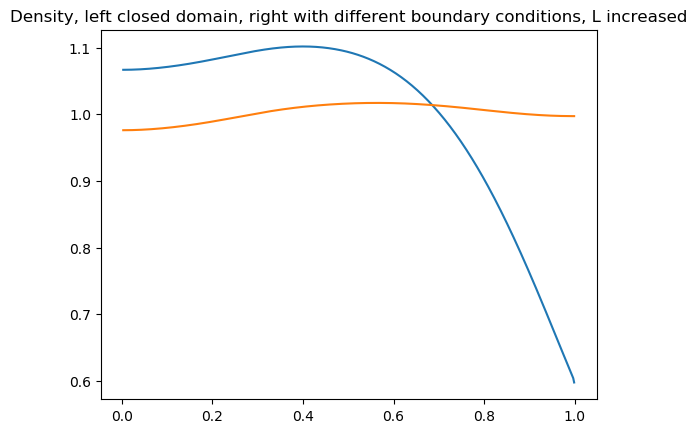

PyObject Text(0.5, 1.0, 'Density, left closed domain, right with different boundary conditions, L increased')

In [19]:
NX1D=500
LX1D=1
xleft1D=0
dx1D=LX1D/(NX1D)

xg1D = xleft1D+dx1D/2:dx1D:xleft1D+LX1D
mask1D,pm1D,xi1D = DIVAnd.DIVAnd_rectdom(xg1D)



xo=rand(1000)


inflation=ones(size(xo))
mask1D[1]=false
#mask1D[end]=false
dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0)
dens1D1,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0;Ladaptiveiterations=0,alphabc=0)
#dens1D1i= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0.5;Ladaptiveiterations=10)
#dens1D[mask1D.==false].=NaN
#dens1D1[mask1D.==false].=NaN


figure()
plot(xi1D[1],dens1D,xi1D[1],dens1D1)

title("Density, left closed domain, right with different boundary conditions")

dens1D,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0.3;Ladaptiveiterations=0)
dens1D1,LHM,LCV,LSCV= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0.3;Ladaptiveiterations=0,alphabc=0)
#dens1D1i= DIVAnd_heatmap(mask1D,pm1D,xi1D,(xo,),inflation,0.5;Ladaptiveiterations=10)
#dens1D[mask1D.==false].=NaN
#dens1D1[mask1D.==false].=NaN



figure()
plot(xi1D[1],dens1D,xi1D[1],dens1D1)

title("Density, left closed domain, right with different boundary conditions, L increased")